In [0]:
import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder


# pandas 출력 설정
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width', 250)

pd.set_option('display.expand_frame_repr', False) # 위 2줄과 의미 동일. 그냥 이거 한 줄로.

In [0]:
# 데이터파일 읽어오기

titanic = pd.read_csv('titanic.csv')

In [20]:
titanic.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [21]:
# 데이터 정보 확인
print(titanic.info())
# => 결측치 포함 여부 확인 / 숫자가 다른거 대비 딸리면 딱 그놈이 결측치 포함하는거임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [176]:
# 결측치 처리
age_mean = np.mean(titanic['Age'])
print(age_mean)
print('--------------------------')

# fillna
titanic['Age'].fillna(age_mean, inplace=True) # inplace=True에 유의
titanic['Cabin'].fillna('N', inplace=True) # inplace=True에 유의
#titanic['Embarked'].dropna(inplace=True) # 아예 NA 포함된 행 전체를 날려버리기 <- 이거 안 먹힘. 그냥 아래로.
titanic.dropna(inplace=True) # <- 이걸로 해야 날아감 -_-a

# 데이터 정보 확인
print(titanic.info())
# => 결측치 포함 여부 재확인

29.69911764705882
--------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


In [33]:
# 범주형 데이터 분포 확인

print(titanic.head())
print('-----------------------------------------------------')
print(titanic['Survived'].value_counts())
print(titanic['Pclass'].value_counts())
print(titanic['Sex'].value_counts())
print(titanic['Cabin'].value_counts())
print(titanic['Embarked'].value_counts())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500     N        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250     N        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500     N        S
-----------------------------------------------------
0    549
1    340
Name

In [0]:
# 범주형 데이터를 문자열값으로 변환
# life, seat, gender, ports 컬럼 추가
# dead/live, 1st/2nd,3rd, woman/man
# cherbourg / queenstown / southampthon

titanic['life'] = titanic['Survived'].apply(lambda x: 'live' if x==1 else 'dead')

def getSeats(x):
  seats = '3rd'
  if x == 1: seats = '1st'
  elif x == 2: seats = '2nd'
  return seats

def getPorts(x):
  ports = 'southampthon'
  if x == 'C': ports = 'cherbourg'
  elif x == 'Q': ports = 'queenstown'
  return ports
 
titanic['seat'] = titanic['Pclass'].apply(lambda x: getSeats(x))
titanic['gender'] = titanic['Sex'].apply(lambda x: 'man' if x == 'male' else 'woman')
titanic['ports'] = titanic['Embarked'].apply(lambda x: getPorts(x))

In [43]:
print(titanic.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  life seat gender         ports
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500     N        S  dead  3rd    man  southampthon
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C  live  1st  woman     cherbourg
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250     N        S  live  3rd  woman  southampthon
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S  live  1st  woman  southampthon
4            5         0       3                           Allen, Mr. 

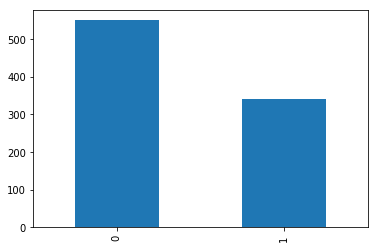

In [178]:
# 탐색적 분석
# exploratory data analysis

# 수집한 데이터에 대해 다양한 각도로 관찰하고 이해하는 과정을 의미
# 데이터를 분석, 예측하기 전, 통계적 방법을 이용해서 시각화하고 직관적으로 이해하는 것

# 관심대상 변수 시각화
# 생존여부 시각화 - 막대그래프

#titanic['Survived'].plot.bar() # 연속형 데이터를 막대그래프로 나타내니 난리남. 따라서 빈도표를 먼저 그린 뒤 다시.
titanic['Survived'].value_counts().plot.bar()
plt.show()

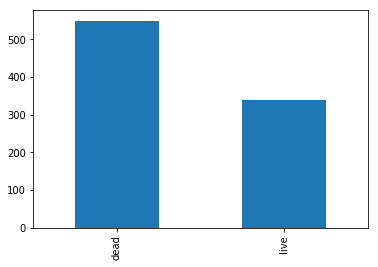

In [48]:
titanic['life'].value_counts().plot.bar()
plt.show()

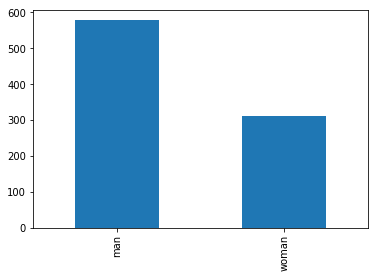

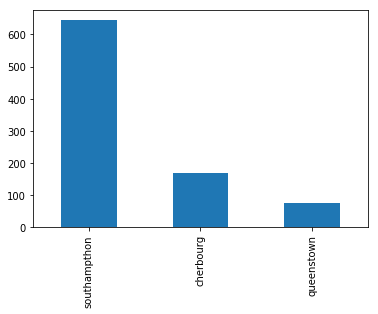

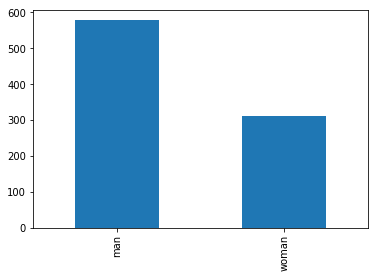

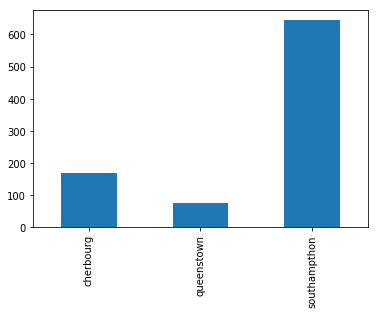

In [179]:
# 성별 시각화 - 범주형 - 막대그래프
# 승선위치 시각화 - 범주형 - 막대그래프

titanic['gender'].value_counts().plot.bar()
plt.show()
titanic['ports'].value_counts().plot.bar()
plt.show()


titanic['gender'].value_counts().sort_index().plot.bar() # value_counts()만 하면 값 큰 순 정렬. 이걸 sort_index()를 통해 다시 오름차순 정렬 -_-a
plt.show()
titanic['ports'].value_counts().sort_index().plot.bar()
plt.show()

In [0]:
def getAges(x):
  ages = '80age'
  if x <= 5: ages = '0ages'
  elif x <= 10: ages = '0.5ages'
  elif x <= 19: ages = '10ages'
  elif x <= 29: ages = '20ages'
  elif x <= 39: ages = '30ages'
  elif x <= 49: ages = '40ages'
  elif x <= 59: ages = '50ages'
  elif x <= 69: ages = '60ages'
  elif x <= 79: ages = '70ages'
  return ages

titanic['ages'] = titanic['Age'].apply(lambda x: getAges(x))

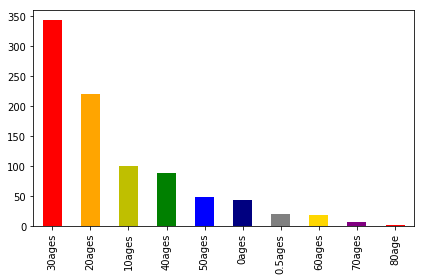

In [181]:
# 승객나이 시각화 - 범주형 - 막대그래프

titanic['ages'].value_counts().plot.bar(color=['r','orange','y','g','b','navy','gray','gold', 'purple'])
plt.tight_layout()
plt.show()

# https://frhyme.github.io/python-lib/img_savefig_%EA%B3%B5%EB%B0%B1%EC%A0%9C%EA%B1%B0/

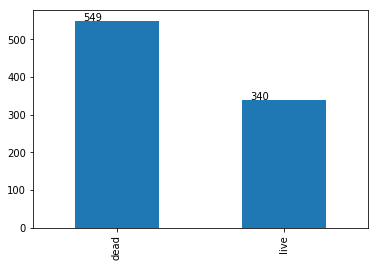

In [182]:
ax = titanic['life'].value_counts().plot.bar()

for p in ax.patches:
  ax.annotate(str(p.get_height()), # annotate 그래프에 주석달 때 // 각 높이 구한 것을!
             (p.get_x()+0.05, p.get_height()+0.05)) # 뒤에 튜플 좌표에 찍어라. (가로, 세로) 인듯?
plt.show()

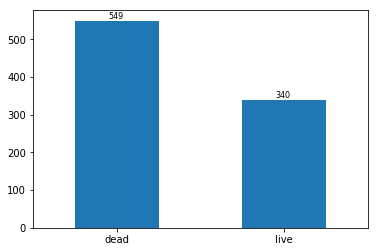

In [183]:
ax = titanic['life'].value_counts().plot.bar() # 값 큰 순서대로 정렬 (나중에 출력 때도 이 기준 - 알파벳 순 등이 아님)

for p in ax.patches:
  ax.text(p.get_x()+0.2, p.get_height()+5,
          str(p.get_height()), fontsize=8) # annotate과 text 차이는, text는 글자크기,폰트 조정 가능
plt.xticks(rotation=0) # 레이블 각도 조정
plt.show()

# 그래프에 주석, 텍스트 추가
# ax.annotate(주석, 주석위치, 화살표 속성) -_-;;
# ax.text(x좌표, y좌표, 텍스트, 폰트, 크기) -_-;;

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64
---------------------------------------------------------
gender  life
man     dead    468
        live    109
woman   dead     81
        live    231
Name: life, dtype: int64
---------------------------------------------------------


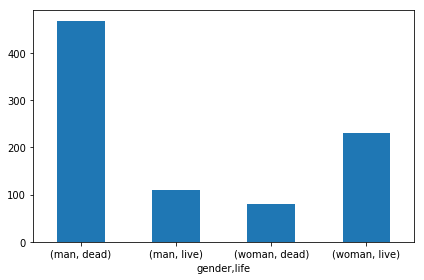

---------------------------------------------------------
life    dead  live
gender            
man      468   109
woman     81   231


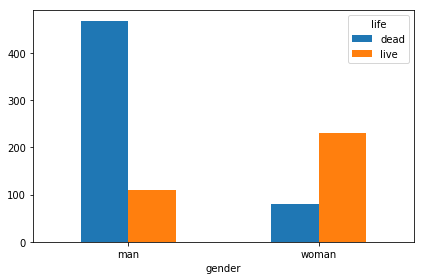

In [184]:
# 관심 대상 이변수 시각화
# 성별 생존여부 시각화

print(titanic.groupby(['Sex', 'Survived'])['Survived'].count())
print('---------------------------------------------------------')
print(titanic.groupby(['gender', 'life'])['life'].count())
print('---------------------------------------------------------')

genderlife = titanic.groupby(['gender', 'life'])['life'].count()
genderlife.plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# 위와 같이 하면 튜플로 묶여서 시각화. 그래프가 각각의 범주로 분리되어 출력
print('---------------------------------------------------------')
genderlife = titanic.groupby(['gender', 'life'])['life'].count().unstack()
print(genderlife)
genderlife.plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# => groupby를 썼다, 근디 그래프로 만들고 싶다?? 그럼 일단 .unstack() 붙이는 것을 고려할 것!

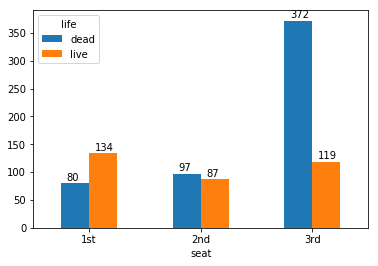

In [185]:
# 좌석등급 별 생존여부 시각화

seatlife = titanic.groupby(['seat', 'life'])['life'].count().unstack() # unstack ㅎㅎ
ax = seatlife.plot.bar()

for p in ax.patches:
  ax.text(p.get_x()+0.05, p.get_height()+5,
         str(p.get_height())) # ax 지롤치는건 나중에 그대로 복붙해서 변형/사용하면 될 것 
plt.xticks(rotation=0)
plt.show()

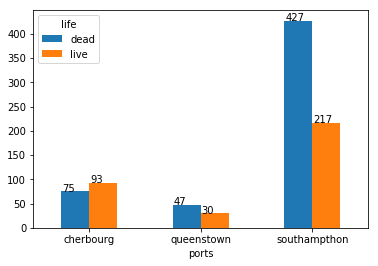

In [186]:
# 승선위치 별 생존여부 시각화

portslife = titanic.groupby(['ports', 'life'])['life'].count().unstack() # unstack ㅎㅎ
ax = portslife.plot.bar()

for p in ax.patches:
  ax.text(p.get_x()+0.01, p.get_height()+0.01,
         str(p.get_height())) # ax 지롤치는건 나중에 그대로 복붙해서 변형/사용하면 될 것 
plt.xticks(rotation=0)
plt.show()

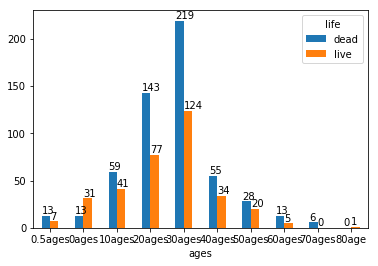

In [187]:
# 나이대 별 생존여부 시각화

agelife = titanic.groupby(['ages', 'life'])['life'].count().unstack() # unstack ㅎㅎ



ax = agelife.plot.bar()

for p in ax.patches:
  ax.text(p.get_x(), p.get_height()+2,
         '%i' %p.get_height()) # ax 지롤치는건 나중에 그대로 복붙해서 변형/사용하면 될 것 
plt.xticks(rotation=0)
plt.show()

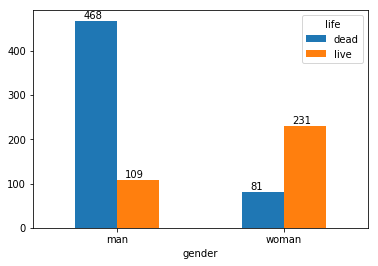

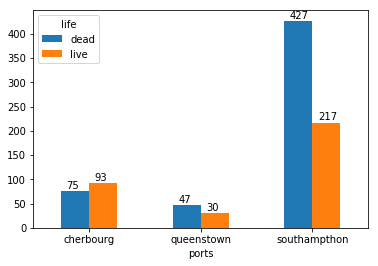

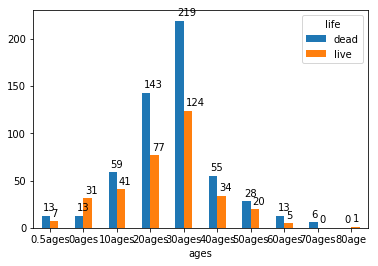

In [188]:
# 반복적인 코드가 많이 보임
# 이러한 코드들을 모아서 함수로 재작성

def graphByLife(x):  
    bylife = titanic.groupby([x, 'life'])['life'].count().unstack()
    
    
    #live = titanic[titanic['life'] == 'live'][x].value_counts()
    #dead = titanic[titanic['life'] == 'dead'][x].value_counts()
    #bylife = pd.DataFrame([live, dead])
    
    #바로 위 3줄과 그 위 1줄은 같은거. 즉, 당초 1줄로 표현될 것을 노가다 하면 3줄짜리로 만들어야 함 (아래 함수 graphByLife2 참조)
    
 
    ax = bylife.plot.bar()
    
    
    
    for p in ax.patches:
      ax.text(p.get_x()+0.05, p.get_height()+5,
      '%i' %p.get_height()) # 파이썬에서는 i가 정수.. 
    
    plt.xticks(rotation=0)
    plt.show

             
graphByLife('gender')
#graphByLife('seats')
graphByLife('ports')
graphByLife('ages')              
              
              

        woman  man
gender    231  109
gender     81  468
------------------------


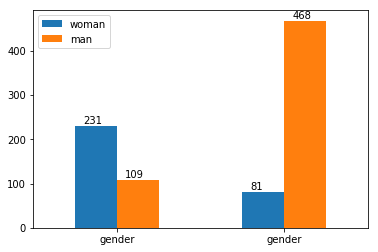

-----------------------------------------------------------------------------

       southampthon  cherbourg  queenstown
ports           217         93          30
ports           427         75          47
------------------------


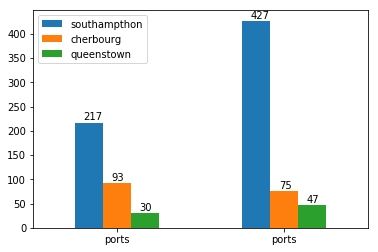

-----------------------------------------------------------------------------

      30ages  20ages  10ages  40ages  0ages  50ages  0.5ages  60ages  80age  70ages
ages   124.0    77.0    41.0    34.0   31.0    20.0      7.0     5.0    1.0     NaN
ages   219.0   143.0    59.0    55.0   13.0    28.0     13.0    13.0    NaN     6.0
------------------------


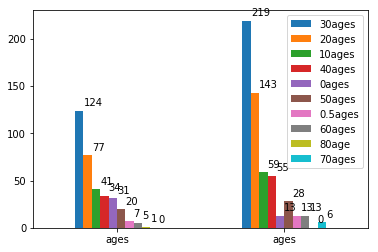

-----------------------------------------------------------------------------



In [189]:
def graphByLife2(x):  
    live = titanic[titanic['life'] == 'live'][x].value_counts()
    dead = titanic[titanic['life'] == 'dead'][x].value_counts()
    bylife = pd.DataFrame([live, dead])
    
    print(bylife)
    print('------------------------')
    
    ax = bylife.plot.bar()
    for p in ax.patches:
      ax.text(p.get_x()+0.05, p.get_height()+5,
      '%i' %p.get_height()) # 파이썬에서는 i가 정수.. 
    
    plt.xticks(rotation=0)
    plt.show()
    print('-----------------------------------------------------------------------------')
    print()
  
graphByLife2('gender')
#graphByLife2('seats')
graphByLife2('ports')
graphByLife2('ages')

In [190]:
# 승객의 직함별 생존여부
titanic['Name'].head()
titanic['Name'].tail()

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [191]:
fmt = ' ([A-Za-z]+)\.' # 빈칸 하나 줘야 함 <- -_-;;;;;;;;
# 직책을 추출하기 위한 패턴 문자열 정의
# Mr, Mrs, Miss, Rev 등만 뽑아서 새로운 컬럼 Titles 만듬

titanic['Name'].str.extract(fmt)

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


         Miss   Mrs     Mr  Master   Dr  Mlle  Col  Mme  Sir   Ms  Major  Lady  Countess  Rev  Capt  Don  Jonkheer
Titles  126.0  98.0   81.0    23.0  3.0   2.0  1.0  1.0  1.0  1.0    1.0   1.0       1.0  NaN   NaN  NaN       NaN
Titles   55.0  26.0  436.0    17.0  4.0   NaN  1.0  NaN  NaN  NaN    1.0   NaN       NaN  6.0   1.0  1.0       1.0
------------------------


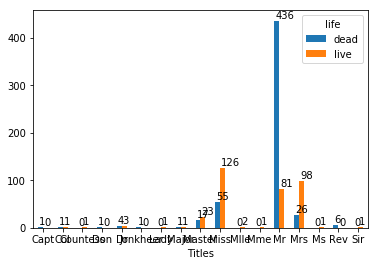

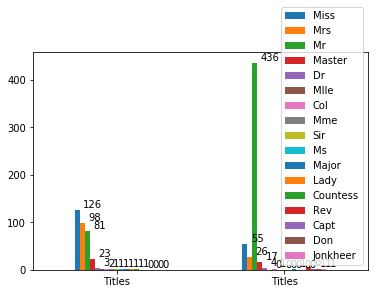

-----------------------------------------------------------------------------



In [192]:
# Mr, Mrs, Miss, Rev 등만 뽑아서 새로운 컬럼 Titles 만들기

titanic['Name'].str.extract(fmt) 
titanic['Titles'] = titanic['Name'].str.extract(fmt) # Mr, Mrs, Miss, Rev 등만 뽑아서 새로운 컬럼 Titles 만듬

graphByLife('Titles')
graphByLife2('Titles')
# 범주 category가 너무 많아 데이터 특성을 파악하는데 방해가 됨.
# 따라서, 중요하지 않은 범주들은 통합을 해두는 것이 좋음.




# 직함 별 생존 여부 시각화

# LabelEncoder로 문자열 값을 숫자형 값으로 변환


In [193]:
bylife = titanic.groupby(['ports', 'life'])['life'].count().unstack()
print(bylife)    


life          dead  live
ports                   
cherbourg       75    93
queenstown      47    30
southampthon   427   217


In [194]:
    
live = titanic[titanic['life'] == 'live']['ports'].value_counts()
dead = titanic[titanic['life'] == 'dead']['ports'].value_counts()
bylife = pd.DataFrame([live, dead])

print(live)
print()
print(dead)
print()
print(bylife)

southampthon    217
cherbourg        93
queenstown       30
Name: ports, dtype: int64

southampthon    427
cherbourg        75
queenstown       47
Name: ports, dtype: int64

       southampthon  cherbourg  queenstown
ports           217         93          30
ports           427         75          47


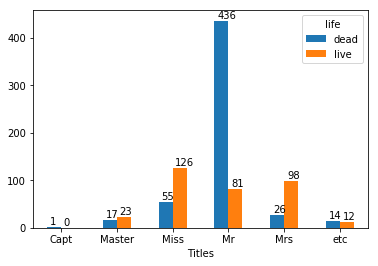

In [196]:
def cleanTitle(x):
  title = ''
  if ((x != 'Miss') & (x != 'Mrs') & (x != 'Mr') & (x != 'Master') & (x != 'Capt')) : 
    title = 'etc'
  else : title = x
  return title

titanic['Titles'] = titanic['Titles'].apply(lambda x: cleanTitle(x)) 

#print(titanic['Titles'])

graphByLife('Titles')


In [200]:
# LabelEncoder로 문자열 값을 숫자형 값으로 변환

from sklearn.preprocessing import LabelEncoder

titles = titanic['Titles']

encoder = LabelEncoder()
encoder.fit(titles)
titanic['title'] = encoder.transform(titles)

encoder.classes_ # 변환결과 확인



array(['Capt', 'Master', 'Miss', 'Mr', 'Mrs', 'etc'], dtype=object)

In [0]:
# 요금Fare별 생존여부
titanic['Fare']

In [205]:
# 좌석위치Cabin별 생존여부
titanic['Cabin'].value_counts()

# A~G, N, T 별로 확인

N                  687
B96 B98              4
G6                   4
C23 C25 C27          4
F33                  3
D                    3
C22 C26              3
F2                   3
E101                 3
D26                  2
E67                  2
C2                   2
B20                  2
C123                 2
E25                  2
B57 B59 B63 B66      2
B51 B53 B55          2
B18                  2
D20                  2
D36                  2
C124                 2
C126                 2
D35                  2
F G73                2
B49                  2
B5                   2
E24                  2
C83                  2
C78                  2
E121                 2
                  ... 
A7                   1
A5                   1
C54                  1
A14                  1
E31                  1
C99                  1
C106                 1
A19                  1
F E69                1
D37                  1
B39                  1
E49                  1
B37        

In [0]:
# 가족 규모 별 생존여부
# 가족 규모 = Slisp (형제자매) + Parch (부모자식)
# 소중대로 분류해서 시각화 